Cargando y preprocesando datos MNIST...
Forma de los datos de entrada (plano): (60000, 784)

--- Estructura del MLP ---


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)


Iniciando entrenamiento (Backpropagation)...
Epoch 1/10
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8676 - loss: 0.4501 - val_accuracy: 0.9551 - val_loss: 0.1441
Epoch 2/10
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9648 - loss: 0.1189 - val_accuracy: 0.9684 - val_loss: 0.1034
Epoch 3/10
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9768 - loss: 0.0778 - val_accuracy: 0.9734 - val_loss: 0.0920
Epoch 4/10
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9814 - loss: 0.0569 - val_accuracy: 0.9738 - val_loss: 0.0914
Epoch 5/10
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9872 - loss: 0.0421 - val_accuracy: 0.9748 - val_loss: 0.0936
Epoch 6/10
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9884 - loss: 0.0342 - val_accuracy: 0.9754 - val_loss: 0.0889
Epoch 7/10
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9899 - loss: 0.0288 - val_accuracy: 0.9749 - val_loss: 0.0934
Epoch 8/10
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 8s

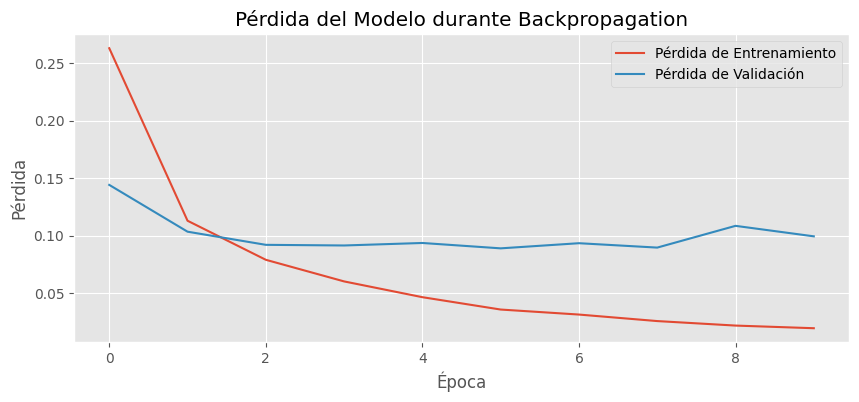

In [44]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# 1. CARGA Y PREPROCESAMIENTO DE DATOS
# ==============================================================================
# Cargamos el famoso dataset MNIST (dígitos escritos a mano)
print("Cargando y preprocesando datos MNIST...")
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Normalizamos las imágenes a un rango de 0 a 1 (Escalamiento)
x_train = x_train / 255.0
x_test = x_test / 255.0

# El MLP espera datos planos (flat). Convertimos las imágenes de 28x28 a un vector de 784.
# (Esta es la capa de entrada del Perceptrón)
x_train_flat = x_train.reshape(-1, 28 * 28)
x_test_flat = x_test.reshape(-1, 28 * 28)

print(f"Forma de los datos de entrada (plano): {x_train_flat.shape}")

# 2. DEFINICIÓN DEL MODELO (MLP - Multi-Layer Perceptron)
# ==============================================================================
# Un MLP es una secuencia de capas densas (perceptrones)

model = keras.Sequential([
    # Capa de Entrada: 784 neuronas (28x28 píxeles)
    keras.layers.InputLayer(input_shape=(784,)),

    # Capa Oculta 1 (Perceptrones): 128 neuronas. Usa ReLU como función de activación.
    keras.layers.Dense(128, activation='relu'),

    # Capa Oculta 2 (Perceptrones): 64 neuronas.
    keras.layers.Dense(64, activation='relu'),

    # Capa de Salida: 10 neuronas (una para cada dígito, 0-9). Usa Softmax para probabilidades.
    keras.layers.Dense(10, activation='softmax')
])

# 3. COMPILACIÓN DEL MODELO
# ==============================================================================
# La elección del optimizador (Adam) define cómo se ejecutará el algoritmo de Backpropagation.
# Adam es un optimizador basado en Descenso de Gradiente, y usa Backpropagation para
# calcular los gradientes y ajustar los pesos.

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', # Pérdida para clasificación multi-clase
              metrics=['accuracy'])

# Imprimir el resumen del modelo (opcional)
print("\n--- Estructura del MLP ---")
model.summary()

# 4. ENTRENAMIENTO (EJECUCIÓN DEL BACKPROPAGATION)
# ==============================================================================
print("\nIniciando entrenamiento (Backpropagation)...")
history = model.fit(
    x_train_flat,
    y_train,
    epochs=10, # Número de pasadas completas sobre los datos
    validation_split=0.15, # Usar 15% de datos para validación
    verbose=1
)

# 5. EVALUACIÓN Y RESULTADOS
# ==============================================================================
print("\n--- Evaluación Final ---")
test_loss, test_acc = model.evaluate(x_test_flat, y_test, verbose=0)

print(f"Pérdida en Datos de Prueba: {test_loss:.4f}")
print(f"Precisión en Datos de Prueba: {test_acc*100:.2f}%")

# Gráfico de la pérdida durante el entrenamiento
plt.figure(figsize=(10, 4))
plt.plot(history.history['loss'], label='Pérdida de Entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de Validación')
plt.title('Pérdida del Modelo durante Backpropagation')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.grid(True)
plt.show()